# Week 10:  Interpolation - some examples

* see these [interpolation slides](https://www.dropbox.com/s/my7oyehxiu1y214/week10_interpolation.pdf?dl=0) for background.

Note: There is also a numpy function that does just linear interpolation: See https://numpy.org/doc/stable/reference/generated/numpy.interp.html

## Import Packages

In [1]:
## import the packages I'll need
import numpy as np
from scipy import interpolate 
import matplotlib.pyplot as plt
import time

### Example #1 from the web page reading

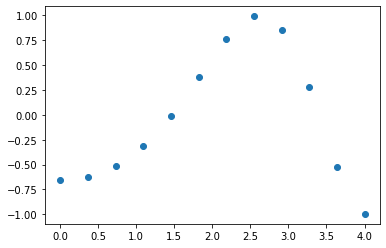

In [2]:
# make synthetic data - a nice smooth function
x = np.linspace(0, 4, 12)
y = np.cos(x**2/3+4)

# make a figure of my synthetic data
plt.plot(x, y, 'o');

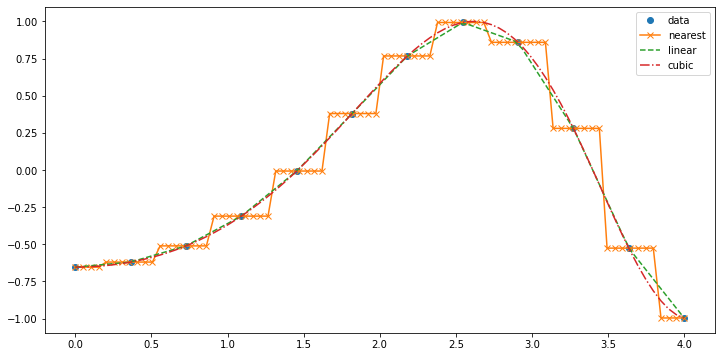

In [3]:
# mess around a bit with basic 1D interpolation methods
f1 = interpolate.interp1d(x, y, kind = 'nearest')  # nearest neighbor

f2 = interpolate.interp1d(x, y, kind = 'linear')  # linear

f3 = interpolate.interp1d(x, y, kind = 'cubic')  # cubic

# evaluate my interpolation function at 80 points not just the original 12 points between x=0.0 and 4.0
xnew = np.linspace(0, 4, 80)  

# plot original data and my interpolation estimates
plt.figure(figsize=(12,6))
plt.plot(x, y, 'o', xnew, f1(xnew), 'x-', xnew, f2(xnew), '--', xnew, f3(xnew),'-.')
plt.legend(['data', 'nearest', 'linear', 'cubic'], loc = 'best');

### More detail with Splines - only use these more complex approaches once you have gained some experience / understanding of interpolation

To draw smooth curves through data points, drafters once used thin flexible strips of wood, hard rubber, metal or plastic called mechanical splines. To use a mechanical spline, pins were placed at a judicious selection of points along a curve in a design, and then the spline was bent, so that it touched each of these pins. Clearly, with this construction, the spline interpolates the curve at these pins. It can be used to reproduce the curve in other drawings. The points where the pins are located are called knots. We can change the shape of the curve defined by the spline by adjusting the location of the knots.

#### Univariate Spline
One-dimensional smoothing spline fits a given set of data points.  Following are the parameters of a Univariate Spline. The UnivariateSpline class in scipy.interpolate is a convenient method to create a function, based on fixed data points class `scipy.interpolate.UnivariateSpline(x, y, w = None, bbox = [None, None], k = 3, s = None, ext = 0, check_finite = False).`

This fits a spline y = spl(x) of degree k to the provided x, y data. Parameters:

    ‘w’ − Specifies the weights for spline fitting. Must be positive. If none (default), weights are all equal.

    ‘s’ − Specifies the number of knots by specifying a smoothing condition.

    ‘k’ − Degree of the smoothing spline. Must be <= 5. Default is k = 3, a cubic spline.

    ext − Controls the extrapolation mode (ext = 0 or ‘extrapolate’, returns the extrapolated value)

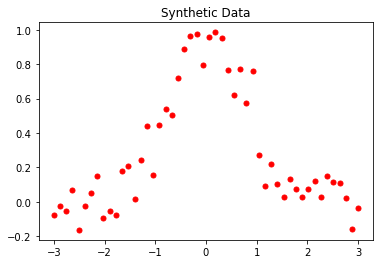

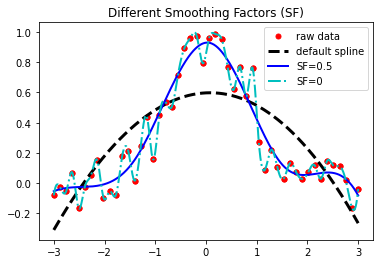

In [4]:
# make a function and add some gaussian random noise, mean 0, variance 1

x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)
plt.plot(x, y, 'ro', ms = 5)
plt.title('Synthetic Data')
plt.show()

spl = interpolate.UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)   # alter the plotting here to go to 3.2

plt.plot(x, y, 'ro', ms = 5)
h0,=plt.plot(x, y, 'ro', ms = 5, label='raw data')
h1,=plt.plot(xs, spl(xs), 'k--', lw = 3, label='default spline')
spl.set_smoothing_factor(0.5)  # less smoothing
h2,=plt.plot(xs, spl(xs), 'b', lw = 2, label='SF=0.5')
spl.set_smoothing_factor(0)    # no smoothing
h3,=plt.plot(xs, spl(xs), 'c-.', lw = 2, label='SF=0')
plt.legend(handles=[h0,h1,h2,h3])
plt.title('Different Smoothing Factors (SF)');

## Example #2: Demos with interp1d - nearest neighbor, linear, cubic

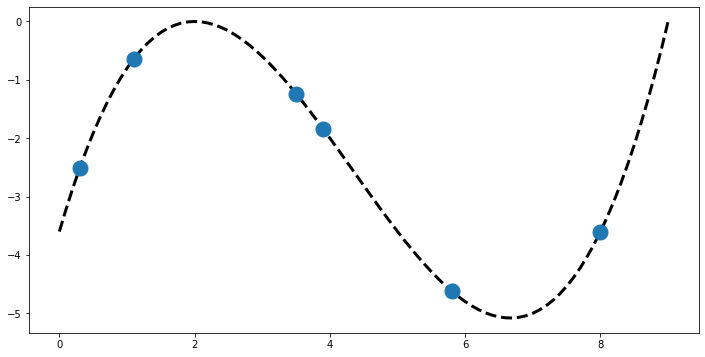

In [5]:
# set up my demo function

# make a nice smooth function
start = 0
step = 0.1
stop = 9+step
x = np.arange(start,stop,step)
a = 0.1
b = -0.7
t = x-2
y=a*t**3+b*t**2

# sample it unevenly
xsamp = np.array([0.3,1.1,3.5,3.9,5.8,8.0])
ysamp = a*(xsamp-2)**3+b*(xsamp-2)**2
xnew = np.arange(xsamp[0],xsamp[-1]+2,0.1)

# interpolate using various interpolation choices.
f1 = interpolate.interp1d(xsamp, ysamp, kind = 'nearest', fill_value='extrapolate')  # nearest neighbor

f2 = interpolate.interp1d(xsamp, ysamp, kind = 'linear', fill_value='extrapolate')  # linear

f3 = interpolate.interp1d(xsamp, ysamp, kind = 'cubic', fill_value='extrapolate')  # cubic

#f4 = interpolate.UnivariateSpline(xsamp, ysamp)
#f4.set_smoothing_factor(0.5)  # less smoothing

# plot original data and my interpolation estimates
plt.figure(figsize=(12,6))
plt.plot(x, y, 'k--', lw=3)
plt.plot(xsamp, ysamp, 'o', ms = 15, label='raw data');

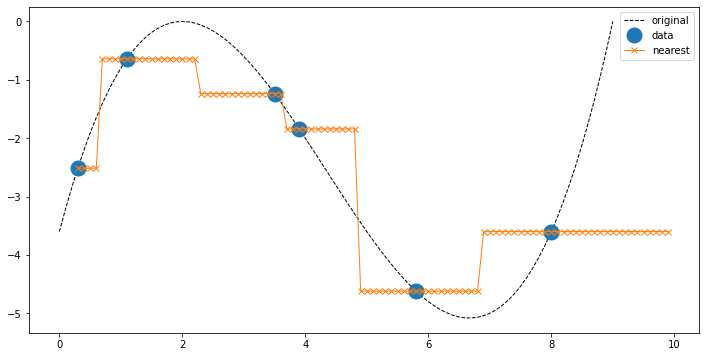

In [6]:
# plot original data and my interpolation estimates
plt.figure(figsize=(12,6))
plt.plot(x, y, 'k--', lw=1)
plt.plot(xsamp, ysamp, 'o', ms = 15, label='raw data')
plt.plot(xnew, f1(xnew), 'x-', lw=1)
plt.legend(['original','data', 'nearest'], loc = 'best');

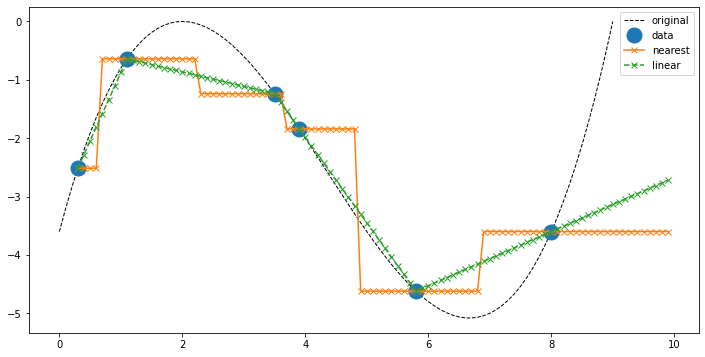

In [7]:
# plot original data and my interpolation estimates
plt.figure(figsize=(12,6))
plt.plot(x, y, 'k--', lw=1)
plt.plot(xsamp, ysamp, 'o', ms = 15, label='raw data')
plt.plot(xnew, f1(xnew), 'x-')
plt.plot(xnew, f2(xnew), 'x--')
plt.legend(['original','data', 'nearest', 'linear'], loc = 'best');

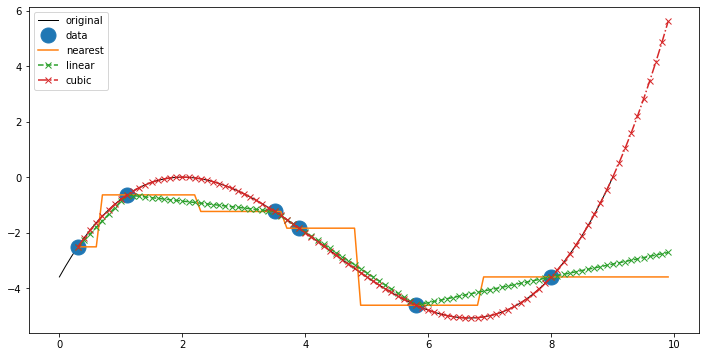

In [8]:
plt.figure(figsize=(12,6))
plt.plot(x, y, 'k-', lw=1)
plt.plot(xsamp, ysamp, 'o', ms = 15, label='raw data')
plt.plot(xnew, f1(xnew))
plt.plot(xnew, f2(xnew), 'x--')
plt.show
plt.plot(xnew, f3(xnew),'x-.')
plt.legend(['original','data', 'nearest', 'linear', 'cubic'], loc = 'best');

## What can go wrong?  Example #3 - overshoot

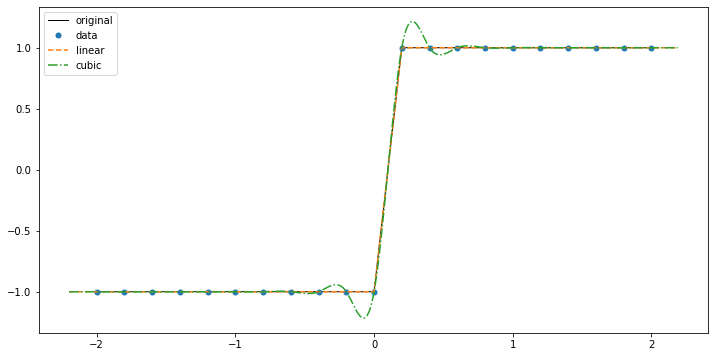

In [9]:
x = np.arange(-2,2.1,0.2)
y = np.zeros_like(x)
y[x<0] = -1
y[x>0] = 1
xnew = np.arange(-2.2,2.2,0.01)    # interpolate onto finer sampling interval; 

# interpolate using various interpolation choices.
f2 = interpolate.interp1d(x, y, kind = 'linear', fill_value='extrapolate')  # linear
f3 = interpolate.interp1d(x, y, kind = 'cubic', fill_value='extrapolate')  # cubic

plt.figure(figsize=(12,6))
plt.plot(x, y, 'k-', lw=1)
plt.plot(x, y, 'o', ms = 5, label='raw data')
plt.plot(xnew, f2(xnew), '--')
plt.show
plt.plot(xnew, f3(xnew),'-.')
plt.legend(['original','data','linear', 'cubic'], loc = 'best');

## What can go wrong? Example #4 - extrapolation issues

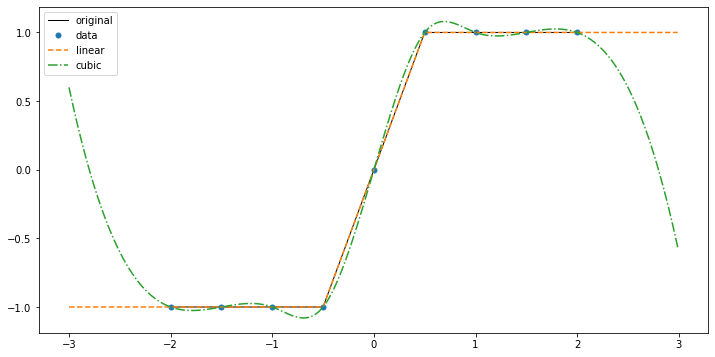

In [10]:
x = np.arange(-2,2.1,0.5)
y = np.zeros_like(x)
y[x<0] = -1
y[x>0] = 1
xnew = np.arange(-3,3,0.01)    # interpolate onto finer sampling interval; 

# interpolate using various interpolation choices.
f2 = interpolate.interp1d(x, y, kind = 'linear', fill_value='extrapolate')  # linear
f3 = interpolate.interp1d(x, y, kind = 'cubic', fill_value='extrapolate')  # cubic

plt.figure(figsize=(12,6))
plt.plot(x, y, 'k-', lw=1)
plt.plot(x, y, 'o', ms = 5, label='raw data')
plt.plot(xnew, f2(xnew), '--')
plt.show
plt.plot(xnew, f3(xnew),'-.')
plt.legend(['original','data','linear', 'cubic'], loc = 'best');